##### DATS 6103 - Individual Project 3 - Arathi Nair

## JOB AUTOMATION AND THE FUTURE OF EMPLOYMENT

Numerous studies have emerged claiming that AI, robotics and other forms of smart automation will displace US jobs in the coming 10 to 15 years. This digital revolution has unleashed a new wave of advanced machines, further automating complex tasks and jeopardizing skilled workers in positions once considered difficult to automate. Research increasingly shows that these disruptive technologies – predictive analytics, artificial intelligence, the Internet of Things, automation and robotics – are not only becoming better, but are also being combined to increase productivity and growth. This report highlights significant differences in the degree of automatability of jobs by industry sector.

**How susceptible are jobs to automation and what these shifts might mean for future employment?**


***Datasets:***

[Education attainment by occupation  - U.S. Bureau of Labor Statistics](https://www.bls.gov/emp/tables/educational-attainment.htm)

[Wages by occupation - U.S. Bureau of Labor Statistics](https://www.bls.gov/oes/current/oes_nat.htm)

[Probability of automation - Mendeley Data](https://data.mendeley.com/datasets/czbvhmzwm3/1)

[Work automation & skills - O*NET Data](https://www.onetonline.org/find/descriptor/result/4.C.3.b.2)


### <u> IMPORT PACKAGES AND FILES

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
from wordcloud import WordCloud,STOPWORDS
import fuzzymatcher
from docx import Document

In [2]:
# Importing the occupation, employment size & growth and education data

xls = pd.ExcelFile("occupation.xlsx")

oc = pd.read_excel(xls, sheet_name = "Table 1.7", header = 2, skipfooter = 4 )
oc = oc.drop(oc.columns[[1]],axis = 1)
oc.columns = ["Employment Title","Occupation type","Employment 2019","Employment 2029",
              "Employment Absolute Change","Employment Percentage Change","Percentage Self-Employed'19",
              "AverageOccupational openings'19-'29","Median annual wage'19","Education","Work Experience",
              "On-the-job Training"]
oc = oc[oc["Occupation type"] == "Line item"]
oc = oc.rename({"Employment Title":"OCC_TITLE"}, axis = 1)
oc

OCC_TITLE Occupation type  \
3                              Chief executives       Line item   
4               General and operations managers       Line item   
5                                   Legislators       Line item   
7           Advertising and promotions managers       Line item   
9                            Marketing managers       Line item   
...                                         ...             ...   
1043    Pump operators, except wellhead pumpers       Line item   
1044                           Wellhead pumpers       Line item   
1045  Refuse and recyclable material collectors       Line item   
1046          Tank car, truck, and ship loaders       Line item   
1047         Material moving workers, all other       Line item   

      Employment 2019  Employment 2029  Employment Absolute Change  \
3               287.9            259.1                       -28.7   
4              2486.4           2630.2                       143.8   
5                53.7             57.0                         3.3   
7                28.6             28.3                        -0.3   
9               286.3            305.4                        19.1   
...               ...              ...                         ...   
1043             10.5             11.5                         1.0   
1044             14.1             14.7                         0.6   
1045            133.6            145.4                        11.7   
1046             12.2             12.0                        -0.2   
1047             29.8             30.3                         0.5   

      Employment Percentage Change Percentage Self-Employed'19  \
3                            -10.0                        24.2   
4                              5.8                         0.6   
5                              6.2                           —   
7                             -1.1                          11   
9                              6.7                           5   
...                            ...                         ...   
1043                           9.7                         4.9   
1044                           4.2                         4.9   
1045                           8.8                         6.6   
1046                          -1.7                         3.7   
1047                           1.5                         3.4   

      AverageOccupational openings'19-'29 Median annual wage'19  \
3                                    13.9                184460   
4                                   204.4                100780   
5                                     3.9                 29270   
7                                     2.5                125510   
9                                    24.6                136850   
...                                   ...                   ...   
1043                                  1.2                 45040   
1044                                  1.5                 55040   
1045                                 18.2                 37840   
1046                                  1.3                 42360   
1047                                  3.3                 31770   

                              Education    Work Experience  \
3                     Bachelor's degree    5 years or more   
4                     Bachelor's degree    5 years or more   
5                     Bachelor's degree  Less than 5 years   
7                     Bachelor's degree  Less than 5 years   
9                     Bachelor's degree    5 years or more   
...                                 ...                ...   
1043  High school diploma or equivalent               None   
1044  High school diploma or equivalent  Less than 5 years   
1045   No formal educational credential               None   
1046   No formal educational credential               None   
1047   No formal educational credential               None   

                    On-the-job Training  
3      

In [3]:
# Importing the board job categories data, growth, salary

oc2 = pd.read_excel(xls, sheet_name = "Table 1.1", header =2, skipfooter = 5 )
oc2 = oc2.rename ({"Unnamed: 0":"OCC_TITLE","Unnamed: 6":"Median annual wage, 2019"}, axis =1)
oc2 = oc2.drop(columns = ["Unnamed: 1"], axis = 1)
oc2

OCC_TITLE      2019      2029  \
0                              Total, all occupations  162795.6  168834.7   
1                              Management occupations   10697.2   11202.2   
2       Business and financial operations occupations    9016.3    9492.5   
3               Computer and mathematical occupations    4845.1    5432.4   
4            Architecture and engineering occupations    2728.9    2803.7   
5      Life, physical, and social science occupations    1460.3    1528.5   
6            Community and social service occupations    2797.7    3146.3   
7                                   Legal occupations    1335.6    1403.2   
8     Educational instruction and library occupations    9744.7   10185.6   
9   Arts, design, entertainment, sports, and media...    2923.6    2997.6   
10  Healthcare practitioners and technical occupat...    9133.7    9967.3   
11                     Healthcare support occupations    7013.4    8598.1   
12                     Protective service occupations    3615.9    3711.1   
13   Food preparation and serving related occupations   13761.3   14769.7   
14  Building and grounds cleaning and maintenance ...    5664.0    5943.4   
15              Personal care and service occupations    4724.1    5088.4   
16                      Sales and related occupations   15525.3   15222.0   
17      Office and administrative support occupations   20633.0   19673.3   
18         Farming, fishing, and forestry occupations    1116.6    1115.1   
19            Construction and extraction occupations    7349.1    7645.4   
20  Installation, maintenance, and repair occupations    6128.0    6301.3   
21                             Production occupations    9447.0    9023.8   

    Number  Percent  Median annual wage, 2019  
0   6039.2      3.7                     39810  
1    505.0      4.7                    105660  
2    476.2      5.3                     69820  
3    587.4     12.1                     88340  
4     74.8      2.7                     81440  
5     68.2      4.7                     68160  
6    348.6     12.5                     46090  
7     67.6      5.1                     81820  
8    441.0      4.5                     50790  
9     73.9      2.5                     51150  
10   833.6      9.1                     68190  
11  1584.8     22.6                     28470  
12    95.2      2.6                     41580  
13  1008.4      7.3                     24220  
14   279.5      4.9                     28330  
15   364.3      7.7                     26220  
16  -303.4     -2.0                     29630  
17  -959.7     -4.7                     37580  
18    -1.5     -0.1                     27180  
19   296.3      4.0                     47430  
20   173.3      2.8                     46630  
21  -423.2     -4.5                     36000

In [4]:
# Importing wages data

wage = pd.read_excel("national_M2018_dl.xlsx" )
wage = wage[(wage["OCC_GROUP"] == "detailed")]
wage = wage.drop(columns = ["OCC_CODE"], axis =1)


In [5]:
# Importing job automation data

auto = pd.read_excel("Degree_of_Automation.xls", header = 3)
auto = auto.rename ({"Occupation":"OCC_TITLE","Context":"AUTOMATION"}, axis =1)
def rate(x):
    if x <= 30:
        return "Least Automated" 
    elif 30 < x <= 45:
        return "Moderately Automated" 
    else:
        return "Highly Automated"

auto["DEGREE"] = auto["AUTOMATION"].apply(rate)
auto = auto.drop(columns = ["Code"], axis =1)
auto.sort_values("OCC_TITLE")

AUTOMATION                                          OCC_TITLE  \
41           51                           Accountants and Auditors   
829           9                                             Actors   
202          38                                          Actuaries   
737          14                                     Acupuncturists   
215          37                                  Acute Care Nurses   
..          ...                                                ...   
534          24                   Wind Turbine Service Technicians   
429          28  Woodworking Machine Setters, Operators, and Te...   
295          33                        Word Processors and Typists   
794          12                                Writers and Authors   
550          23                 Zoologists and Wildlife Biologists   

                   DEGREE  
41       Highly Automated  
829       Least Automated  
202  Moderately Automated  
737       Least Automated  
215  Moderately Automated  
..                    ...  
534       Least Automated  
429       Least Automated  
295  Moderately Automated  
794       Least Automated  
550       Least Automated  

[873 rows x 3 columns]

In [6]:
# Importing probability of job automation data

document = Document('Probability of Automation Data Set.docx')

tables = []
for table in document.tables:
    df = [['' for i in range(len(table.columns))] for j in range(len(table.rows))]
    for i, row in enumerate(table.rows):
        for j, cell in enumerate(row.cells):
            if cell.text:
                df[i][j] = cell.text
    tables.append(pd.DataFrame(df))
doc = pd.concat(tables)
doc.columns = doc.iloc[0]
doc = doc.iloc[1:,:]
doc = doc[doc["Routineness"]!="Routineness"]
doc = doc.drop(columns = ["No.","Stratum"], axis = 1)
doc = doc.rename({"Occupation" : "OCC_TITLE"},axis = 1)
doc

0                                           OCC_TITLE P(Auto) Routineness  \
1   Chief executives, public administrators, and l...   0.015       0.161   
2                                  Financial managers   0.069       0.744   
3       Human resources and labour relations managers   0.006       0.355   
4   Managers and specialists in marketing, advert....   0.023       0.531   
5            Managers in education and related fields   0.006       0.340   
..                                                ...     ...         ...   
24                     Machine feeders and offbearers   0.930       0.705   
25     Garage and service station related occupations   0.910       0.765   
26             Vehicle washers and equipment cleaners   0.370       0.793   
27                      Packers and packagers by hand   0.380       0.890   
28  Laborers, freight, stock, and material handler...   0.850       0.498   

0  Complexity  
1       0.979  
2       0.961  
3       0.913  
4       0.813  
5       0.825  
..        ...  
24      0.117  
25      0.062  
26      0.002  
27      0.039  
28      0.161  

[291 rows x 4 columns]

### <u> COMBINING DATAFRAMES

In [7]:
# Salary, employment and automation 

df = wage[wage['OCC_TITLE'].isin(auto['OCC_TITLE'])]
df = df[["OCC_TITLE","TOT_EMP","A_MEAN"]]
df = pd.merge(df, auto, on ='OCC_TITLE')
df

OCC_TITLE  TOT_EMP  A_MEAN  \
0                                    Chief Executives   195530  200140   
1                     General and Operations Managers  2289770  123880   
2                 Advertising and Promotions Managers    25260  133090   
3                                  Marketing Managers   240440  147240   
4                                      Sales Managers   379050  140320   
..                                                ...      ...     ...   
635  Gas Compressor and Gas Pumping Station Operators     3460   62900   
636           Pump Operators, Except Wellhead Pumpers    10820   47510   
637                                  Wellhead Pumpers    13280   53870   
638         Refuse and Recyclable Material Collectors   118520   40560   
639                 Tank Car, Truck, and Ship Loaders     9000   42330   

     AUTOMATION                DEGREE  
0            42  Moderately Automated  
1            32  Moderately Automated  
2            25       Least Automated  
3            28       Least Automated  
4            32  Moderately Automated  
..          ...                   ...  
635          44  Moderately Automated  
636          50      Highly Automated  
637          25       Least Automated  
638          52      Highly Automated  
639          22       Least Automated  

[640 rows x 5 columns]

In [8]:
# Education, percentage change in job demand, automation 

df2 = fuzzymatcher.fuzzy_left_join(auto, oc, left_on = "OCC_TITLE", right_on = "OCC_TITLE")
df2 = df2[["AUTOMATION","OCC_TITLE_left","DEGREE","Employment 2019", "Employment 2029","Median annual wage'19",
           "Employment Percentage Change","Education"]]
df2 = df2.rename ({"OCC_TITLE_left":"OCC_TITLE","Employment Percentage Change":"% CHANGE '19-'29",
                   "Education":"EDUCATION"}, axis =1)
df2["EDUCATION"] = df2["EDUCATION"].replace(['Some college, no degree'],'No formal educational credential')
df2["Median annual wage'19"] = df2["Median annual wage'19"].replace({">=$208,000":"208000","—":0})
df2 = df2.dropna()
df2

AUTOMATION                                          OCC_TITLE  \
0             70                                      Travel Agents   
2             68  Postal Service Mail Sorters, Processors, and P...   
3             67      Medical and Clinical Laboratory Technologists   
18            66                Chemical Plant and System Operators   
19            66                                Telephone Operators   
...          ...                                                ...   
4867           2                        Manicurists and Pedicurists   
4868           2                                           Midwives   
4869           1                                     Art Therapists   
4877           1   Manufactured Building and Mobile Home Installers   
4878           1                          Watch and Clock Repairers   

                DEGREE  Employment 2019  Employment 2029  \
0     Highly Automated             82.0             60.8   
2     Highly Automated             98.5             80.9   
3     Highly Automated            337.8            362.5   
18    Highly Automated             29.2             28.3   
19    Highly Automated              5.0              3.6   
...                ...              ...              ...   
4867   Least Automated            155.3            185.2   
4868   Least Automated              7.2              8.1   
4869   Least Automated            143.3            166.0   
4877   Least Automated              2.9              2.2   
4878   Least Automated              3.2              2.1   

     Median annual wage'19  % CHANGE '19-'29  \
0                    40660             -25.9   
2                    60140             -17.8   
3                    53120               7.3   
18                   62550              -3.1   
19                   35750             -27.9   
...                    ...               ...   
4867                 25770              19.2   
4868                105030              11.6   
4869                 84950              15.9   
4877                 33890             -22.3   
4878                 42520             -32.3   

                              EDUCATION  
0     High school diploma or equivalent  
2     High school diploma or equivalent  
3                     Bachelor's degree  
18    High school diploma or equivalent  
19    High school diploma or equivalent  
...                                 ...  
4867      Postsecondary nondegree award  
4868                    Master's degree  
4869                    Master's degree  
4877  High school diploma or equivalent  
4878  High school diploma or equivalent  

[858 rows x 8 columns]

In [9]:
# Education, percentage change in job demand, automation for board job categories

df3 = fuzzymatcher.fuzzy_left_join(oc2, auto, left_on = "OCC_TITLE", right_on = "OCC_TITLE")
df3 = df3.iloc[1:,3:]
df3["OCC_TITLE_left"] = df3["OCC_TITLE_left"].str.rsplit(' ', 1).str[0]
df3

OCC_TITLE_left     2019     2029  Number  \
1                                        Management  10697.2  11202.2   505.0   
5                 Business and financial operations   9016.3   9492.5   476.2   
69                        Computer and mathematical   4845.1   5432.4   587.4   
124                    Architecture and engineering   2728.9   2803.7    74.8   
132              Life, physical, and social science   1460.3   1528.5    68.2   
185                    Community and social service   2797.7   3146.3   348.6   
186                                           Legal   1335.6   1403.2    67.6   
189             Educational instruction and library   9744.7  10185.6   441.0   
243  Arts, design, entertainment, sports, and media   2923.6   2997.6    73.9   
300          Healthcare practitioners and technical   9133.7   9967.3   833.6   
361                              Healthcare support   7013.4   8598.1  1584.8   
365                              Protective service   3615.9   3711.1    95.2   
385            Food preparation and serving related  13761.3  14769.7  1008.4   
390   Building and grounds cleaning and maintenance   5664.0   5943.4   279.5   
449                       Personal care and service   4724.1   5088.4   364.3   
510                               Sales and related  15525.3  15222.0  -303.4   
576               Office and administrative support  20633.0  19673.3  -959.7   
577                  Farming, fishing, and forestry   1116.6   1115.1    -1.5   
578                     Construction and extraction   7349.1   7645.4   296.3   
635           Installation, maintenance, and repair   6128.0   6301.3   173.3   
636                                      Production   9447.0   9023.8  -423.2   

     Percent  Median annual wage, 2019  AUTOMATION  \
1        4.7                    105660        31.0   
5        5.3                     69820        39.0   
69      12.1                     88340        16.0   
124      2.7                     81440        26.0   
132      4.7                     68160        16.0   
185     12.5                     46090        31.0   
186      5.1                     81820        26.0   
189      4.5                     50790        42.0   
243      2.5                     51150        16.0   
300      9.1                     68190        21.0   
361     22.6                     28470        21.0   
365      2.6                     41580        36.0   
385      7.3                     24220        32.0   
390      4.9                     28330        29.0   
449      7.7                     26220        16.0   
510     -2.0                     29630        32.0   
576     -4.7                     37580        33.0   
577     -0.1                     27180        31.0   
578      4.0                     47430        25.0   
635      2.8                     46630        28.0   
636     -4.5                     36000        41.0   

                                       OCC_TITLE_right                DEGREE  
1                                  Management Analysts  Moderately Automated  
5                                   Financial Managers  Moderately Automated  
69        Mathematical Science Teachers, Postsecondary       Least Automated  
124             Architectural and Engineering Managers       Least Automated  
132                 Social Science Research Assistants       Least Automated  
185              Social and Community Service Managers  Moderately Automated  
186                    Paralegals and Legal Assistants       Least Automated  
189                                Library Technicians  Moderately Automated  
243                    Athletes and Sports Competitors       Least Automated  
300                          Healthcare Social Workers       Least Automated  
361                          Healthcare Social Workers       Least Automated  
365                              Food Service Managers  Moderately Automated  
385  First-Line Supervisors of Food Pr

In [10]:
# Probability of automation

prob = doc.copy()
def degree(x):
    if x < 0.1:
        return "Low" 
    elif 0.1 <= x <= 0.9:
        return "Moderate" 
    else:
        return "High"
prob["Degree"] = prob["P(Auto)"].astype(float).apply(degree)
prob

0                                           OCC_TITLE P(Auto) Routineness  \
1   Chief executives, public administrators, and l...   0.015       0.161   
2                                  Financial managers   0.069       0.744   
3       Human resources and labour relations managers   0.006       0.355   
4   Managers and specialists in marketing, advert....   0.023       0.531   
5            Managers in education and related fields   0.006       0.340   
..                                                ...     ...         ...   
24                     Machine feeders and offbearers   0.930       0.705   
25     Garage and service station related occupations   0.910       0.765   
26             Vehicle washers and equipment cleaners   0.370       0.793   
27                      Packers and packagers by hand   0.380       0.890   
28  Laborers, freight, stock, and material handler...   0.850       0.498   

0  Complexity    Degree  
1       0.979       Low  
2       0.961       Low  
3       0.913       Low  
4       0.813       Low  
5       0.825       Low  
..        ...       ...  
24      0.117      High  
25      0.062      High  
26      0.002  Moderate  
27      0.039  Moderate  
28      0.161  Moderate  

[291 rows x 5 columns]

### <u> DATA ANALYSIS

### 1. Automation In Current Workforce

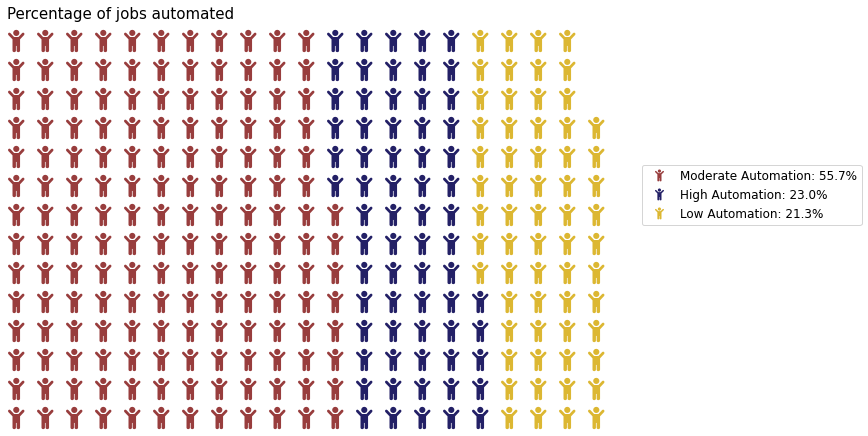

In [11]:
# Percentage of jobs automated

waf = prob[["Degree","P(Auto)"]].copy()
value = dict(waf["Degree"].value_counts())
percent = dict(waf["Degree"].value_counts(normalize = True))
labels = [f'{k} Automation: {v*100:.1f}%' for k,v in percent.items()]

# Plotting the percentage of jobs based on degree of automation
fig = plt.figure(FigureClass = Waffle, rows = 14, values = value,
                 colors = ("#983D3D","#232066", "#DCB732"),icons = 'child', 
                 icon_size = 22, icon_legend = True,font_size = 20,
                 legend = {"loc": (1.05,0.5), "labels":labels,'fontsize': 12},
                 title = {"label":"Percentage of jobs automated",'loc': 'left', "fontsize": 15},
                 figsize = (12, 8)) 
plt.show()


****An increasing number of jobs in the US are adopting automation and new techonolgies across all sectors. 23% of current jobs in the US are at high risk of automation, 55.7% of the jobs fall into the moderate automation range, and only 23% of jobs are currently least affected by automation.****

### 2. Job Roles & Probability Of Automation

In [12]:
# Plotting the types of jobs automated based on degree of automation

fig = px.scatter(prob,x = prob["OCC_TITLE"],y = "P(Auto)",hover_data = ['OCC_TITLE','Degree'], color = 'Degree')
fig.update_layout(title = " Degree Of Automation", yaxis_title = "Probability Of Automation",
                  xaxis_title = " ", template = "plotly_white", font = dict(size = 12),
                  legend = dict(orientation = "h",yanchor = "bottom",y = 1.02,
                                xanchor = "right",x = 1, title = " "))

fig.update_traces(hovertemplate = prob["OCC_TITLE"]) 
fig.update_layout(margin = {'l':0,'r':0})
fig.show()



****Top Executives, Scientists, Civil Engineers, Physicians, Therapists, Artists, Social Workers, Astronomists & Physicists jobs are largely confined to the low-risk category. Whereas the probability of job automation is seen to increase as jobs shift towards manual labor centric roles.****

### 3. Job Complexity & Job Automation Risk

In [13]:
# Plotting strength of relationshp between job complexity & job automation

from scipy.stats import pearsonr 
corr, _ = pearsonr(doc["P(Auto)"].astype(float), doc["Complexity"].astype(float)) 
print('Pearsons correlation: %.3f' % corr)

fig = px.scatter(doc, x = "P(Auto)", y = "Complexity", trendline = "ols",template = "ggplot2")
fig.update_traces(hovertemplate = doc['OCC_TITLE']) 
fig.update_xaxes(title = "P(Automation)")
fig.update_layout(margin = {'l':0,'r':0,'t':0,'b':0})
fig.show()

Pearsons correlation: -0.712


****The above graph depicts a clear inverse correlation between the complexity of job roles and the probability of job automation, indicating that less complex jobs are at higher risk of automation.****

### 4. Job Routiness & Job Automation Risk

In [14]:
# Plotting strength of relationshp between job routiness & job automation

corr, _ = pearsonr(doc["P(Auto)"].astype(float), doc["Routineness"].astype(float)) 
print('Pearsons correlation: %.3f' % corr)

fig = px.scatter(doc, x = "P(Auto)", y = "Routineness", trendline = "ols", template = "ggplot2")
fig.update_traces(hovertemplate = doc['OCC_TITLE']) 
fig.update_xaxes(title = "P(Automation)")
fig.update_layout(margin = {'l':0,'r':0,'t':0,'b':0})
fig.show()

Pearsons correlation: 0.507


****Whereas, there is a strong positive correlation between routine intensive jobs and probability of job automation. Routine jobs governed by a clear set of steps or a process will make it easier for computers and machines to replicate.****

### 5. Job Automation Based On Income Level

In [15]:
# Plotting job wages and degree of automation

data = df.copy()
data = data.replace({"*":0})
data.dtypes
data.sort_values(by="A_MEAN",ascending=False)
data["RANGE"] = pd.cut(data["A_MEAN"],bins = 4)
data["RANGE"] = data["RANGE"].astype(str).replace({"(133510.0, 200265.0]": "133510 - 200265",
                                       "(66755.0, 133510.0]":"66755 - 133510", 
                                       "(200265.0, 267020.0]":"200265 - 267020",
                                       "(-267.02, 66755.0]":"0 - 66755"})

job =  data.copy()
job = job.groupby(["RANGE","DEGREE"])[["OCC_TITLE"]].count().reset_index()
colors = {"Highly Automated":"#d62728","Moderately Automated":"#ff7f0e","Least Automated":"#17becf"}

fig = px.bar(job, x = "RANGE", y = "OCC_TITLE", color = "DEGREE", barmode = "group",color_discrete_map = colors) 
fig.update_layout(title = "Job Automation By Salary",xaxis_title = " ",yaxis_title = "Number of jobs",
                  legend = dict(orientation = "h",yanchor = "bottom",y = 1.02,xanchor = "right",
                                x = 1, title = ""), template = "plotly_white",
                  xaxis = {"categoryorder":"total descending"})
fig.update_traces(hovertemplate = "Jobs: %{y:}K") 
fig.update_yaxes(ticksuffix = "K")
fig.update_xaxes(tickprefix = "$")
fig.show()

****There is a clear distinction between job wages and likelihood of job automation; low-wage jobs face higher probability of automation while higher-wage jobs are less prone to automation.****

In [16]:
# Plotting boxplot for job wages and degree of automation

fig = px.box(data, x = data["RANGE"], y = "AUTOMATION",hover_data = ['OCC_TITLE', 'DEGREE'], points = "all")
fig.update_layout(title = "",xaxis_title = "",yaxis_title = "Automation",legend_orientation = "h",
                  template = "plotly_white",xaxis = {"categoryorder":"total descending"})
fig.update_traces(marker_color = "#17becf")
fig.update_xaxes(tickprefix = "$")
fig.show()

****Lower salaries have wide automation ranges indicating larger variation in job automation rates. Automation ranges are smaller among higher salary groups. While the medians are the same in the lower two salary ranges, the absolute numbers of job automations in these salary groups are higher, which may suggest greater job losses to automation.****

### 6. Job Automation Based On Educational Attainment

In [17]:
# No. of jobs automated and education

edu = df2.copy()
edu = edu.groupby(["DEGREE","EDUCATION"])["OCC_TITLE"].count().reset_index()

# Plotting numbers of jobs automated based on education
colors = {"Highly Automated":"#d62728","Moderately Automated":"#ff7f0e","Least Automated":"#17becf"}

fig = px.bar(edu, x = edu["EDUCATION"].astype(str), y = edu["OCC_TITLE"],color = edu["DEGREE"].astype(str), 
             barmode = "group",color_discrete_map = colors) 

fig.update_layout(title = "Job Automation By Education Levels",xaxis_title = " ",yaxis_title = "Number of jobs",
                  legend = dict(orientation = "h",yanchor = "bottom",y = 1.02,xanchor = "right",
                                x = 1, title = ""),template = "plotly_white",
                  xaxis = dict(tickmode = 'array', 
                               tickvals = ["High school diploma or equivalent", 
                                           "Bachelor's degree", "No formal educational credential", 
                                           "Doctoral or professional degree","Postsecondary nondegree award", 
                                           "Associate's degree","Master's degree"],
                               ticktext = ["High school <br> diploma", "Bachelor's <br> degree", 
                                           "No formal <br> education","Doctoral or <br> professional degree", 
                                           "Postsecondary <br> nondegree", "Associate's <br> degree",
                                           "Master's <br> degree"]))
fig.update_traces(hovertemplate = "Jobs: %{y:}K") 
fig.update_yaxes(ticksuffix = "K")

fig.show()

# Plotting percentage of jobs automated based on education

edu_pcts = edu.copy()
edu_pcts = edu_pcts.groupby(["EDUCATION","DEGREE"]).agg({"OCC_TITLE": 'sum'})
edu_pcts = edu_pcts.groupby(level = 0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index()
edu_pcts

colors = {'Highly Automated':'#d62728','Moderately Automated':'#ff7f0e','Least Automated':'#17becf'}

fig = px.bar(edu_pcts, x = edu_pcts["EDUCATION"].astype(str), y = edu_pcts["OCC_TITLE"],  
             color = edu_pcts["DEGREE"].astype(str), barmode = 'group',color_discrete_map = colors) 

fig.update_layout(title = "Job Automation By Education Levels(%)",xaxis_title = " ",
                  yaxis_title = "Number of jobs",legend = dict(orientation = "h",yanchor="bottom",
                                                               y = 1.02,xanchor = "right",x = 1, title = ""),
                  template = "plotly_white",xaxis = dict(tickmode = 'array', 
                                                         tickvals = ["High school diploma or equivalent", 
                                                                     "Bachelor's degree", 
                                                                     "No formal educational credential", 
                                                                     "Doctoral or professional degree",
                                                                     "Postsecondary nondegree award", 
                                                                     "Associate's degree","Master's degree"],
                                                         ticktext = ["High school <br> diploma", 
                                                                     "Bachelor's <br> degree", 
                                                                     "No formal <br> education",
                                                                     "Doctoral or <br> professional degree", 
                                                                     "Postsecondary <br> nondegree", 
                                                                     "Associate's <br> degree",
                                                                     "Master's <br> degree"]))
fig.update_traces(hovertemplate = "Jobs: %{y:}%") 
fig.update_yaxes(ticksuffix = "%")
fig.show()

****Although percentage of job automation risk for all education levels is moderate to low. Jobs requiring less educational attainment have higher percentage of automated jobs, indicating workers with higher educational attainment would be less vulnerable in the long run.****

In [18]:
# Plotting boxplot for jobs automated based on education

fig = px.box(df2, x = df2["EDUCATION"].astype(str), y = "AUTOMATION",  points = "all",
            hover_data = ['OCC_TITLE', 'DEGREE'])
fig.update_layout(title = "",xaxis_title = "",
                  yaxis_title = "Automation",legend_orientation = "h",
                  template = "plotly_white",xaxis = dict(tickmode = 'array', 
                               tickvals = ["High school diploma or equivalent", "Bachelor's degree",
                                           "Associate's degree","No formal educational credential",  
                                           "Postsecondary nondegree award","Doctoral or professional degree",
                                           "Master's degree"],
                               ticktext = ["High school <br> diploma", "Bachelor's <br> degree",
                                           "Associate's <br> degree","No formal <br> education", 
                                           "Postsecondary <br> nondegree","Doctoral or <br> professional degree", 
                                           "Master's <br> degree"],categoryorder = "total descending"))
fig.update_traces(marker_color = "#17becf")

fig.show()

***Median percentage of automation rates are lower as the educational levels increase. The main exceptions are the no formal education groups, which do not follow the same trend and the associate's degree which have higher automation rates. Having a higher level graduate degree protects against potential automation related job losses.***

### 7. Job Segments At Risk

In [19]:
# Employment size 

emp = fuzzymatcher.fuzzy_left_join(oc, prob, left_on = "OCC_TITLE", right_on = "OCC_TITLE")
emp = emp.iloc[:,3:]
emp["Median annual wage'19"] = emp["Median annual wage'19"].replace({">=$208,000":"208000","—":0})
emp = emp[(emp["Median annual wage'19"] != 0)]
emp = emp.rename({"OCC_TITLE_left":"Occupation"}, axis = 1)

# Plotting employment size based on median salary and education

fig = px.scatter(emp, x = "Median annual wage'19", y = "P(Auto)",color = 'Education',
                 size = "Employment 2019",size_max = 40,hover_data = ['Occupation',"Employment 2019"])
fig.update_yaxes(title = "P(Automation)")
fig.update_xaxes(title = "")
fig.update_layout(template = "plotly_white",legend_orientation = "h")
fig.update_layout(margin = {'l':0,'r':0,'t':0,'b':0})
fig.update_xaxes(tickprefix = "$")
fig.show()

****A large population of employees in the lower wage group with low education level are highly vulnerable to job displacement in the future. We also notice a few high paying jobs such as accountants, sales representatives and managers (general/service/operational) could also face job losses due to increased automation of repetitive tasks.****

### 8. Future Employment Growth

In [20]:
# Employment growth rate in absolute

fig = go.Figure()
fig.add_trace(go.Scatter(x = df3["2019"], y = df3["OCC_TITLE_left"], 
                         marker = dict(color = "crimson", size = 12), 
                         mode = "markers", name = "2019"))

fig.add_trace(go.Scatter(x = df3["2029"], y = df3["OCC_TITLE_left"], 
                         marker = dict(color = "gold", size = 12),
                         mode = "markers", name = "2029"))

fig.update_layout(title = dict(text ='Employment Growth Rate(Absolute)', 
                               x = 0.4, xanchor='center', y = 0.98,yanchor = 'top'),
                  xaxis_title = "Number of jobs",yaxis_title = "",template = "ggplot2",
                  height = 700, width = 1000,font = dict(size = 10),
                  legend = dict(orientation = "h",yanchor = "bottom",
                                y = 1.00,xanchor = "right",x = 1, title  = ""))
fig.update_layout(margin = {'l':0,'r':0,'t':0,'b':0})
fig.show()

# Employment growth rate in percentages

df3["Color"] = np.where(df3["Percent"]<0, 'crimson', 'teal')
fig = go.Figure()
fig.add_trace(go.Bar(x = df3["OCC_TITLE_left"], y = df3["Percent"],marker_color = df3["Color"],
                    text = df3["Percent"], textposition = "outside"))
fig.update_xaxes(showticklabels = False)
fig.update_layout(title=dict(text ='Employment Growth Rate(Percentage)', 
                             x = 0.24, xanchor = 'center', y = 0.98,yanchor ='top'),
                  template = "ggplot2",height = 600, width = 1000,hoverlabel_font_color = 'white')

fig.update_yaxes(title = "Percentage Growth", ticksuffix = "%")
 

fig.show()

***The future employment growth is likely to shift towards occupations like Healthcare, Social Service, Computer & Mathematical sectors which deal with non-routine tasks and require high cognitive skills and interpersonal skills. Whereas occupations like Production, Sales support, Farming & Agricultural sectors which are based on extensive routine task and follow explicit, systematic procedures will see a declined growth rate in the coming years.***

### <u> CONCLUSION

***As companies embrace and implement automation, the workforce will be elevated to more complex and creative job functions.***
    
***More businesses will focus on integration of human centric and AI centric processes.***
    
***Highly creative or technical positions are most likely to prevail which require cognitive skills, interpersonal skills and emotional intelligence.***
    
***Low-wage earners will be among the first to see their jobs disappear, since many of their tasks are routine based.***
    
***Future workforce may need to switch occupations, acquire new skills and may also require to obtain higher educational qualifications.***
    
***Moreover, the ongoing pandemic would force more businesses to speed up the job automation process. The labor-saving technologies could become permanent, displacing millions of jobs in the future.***

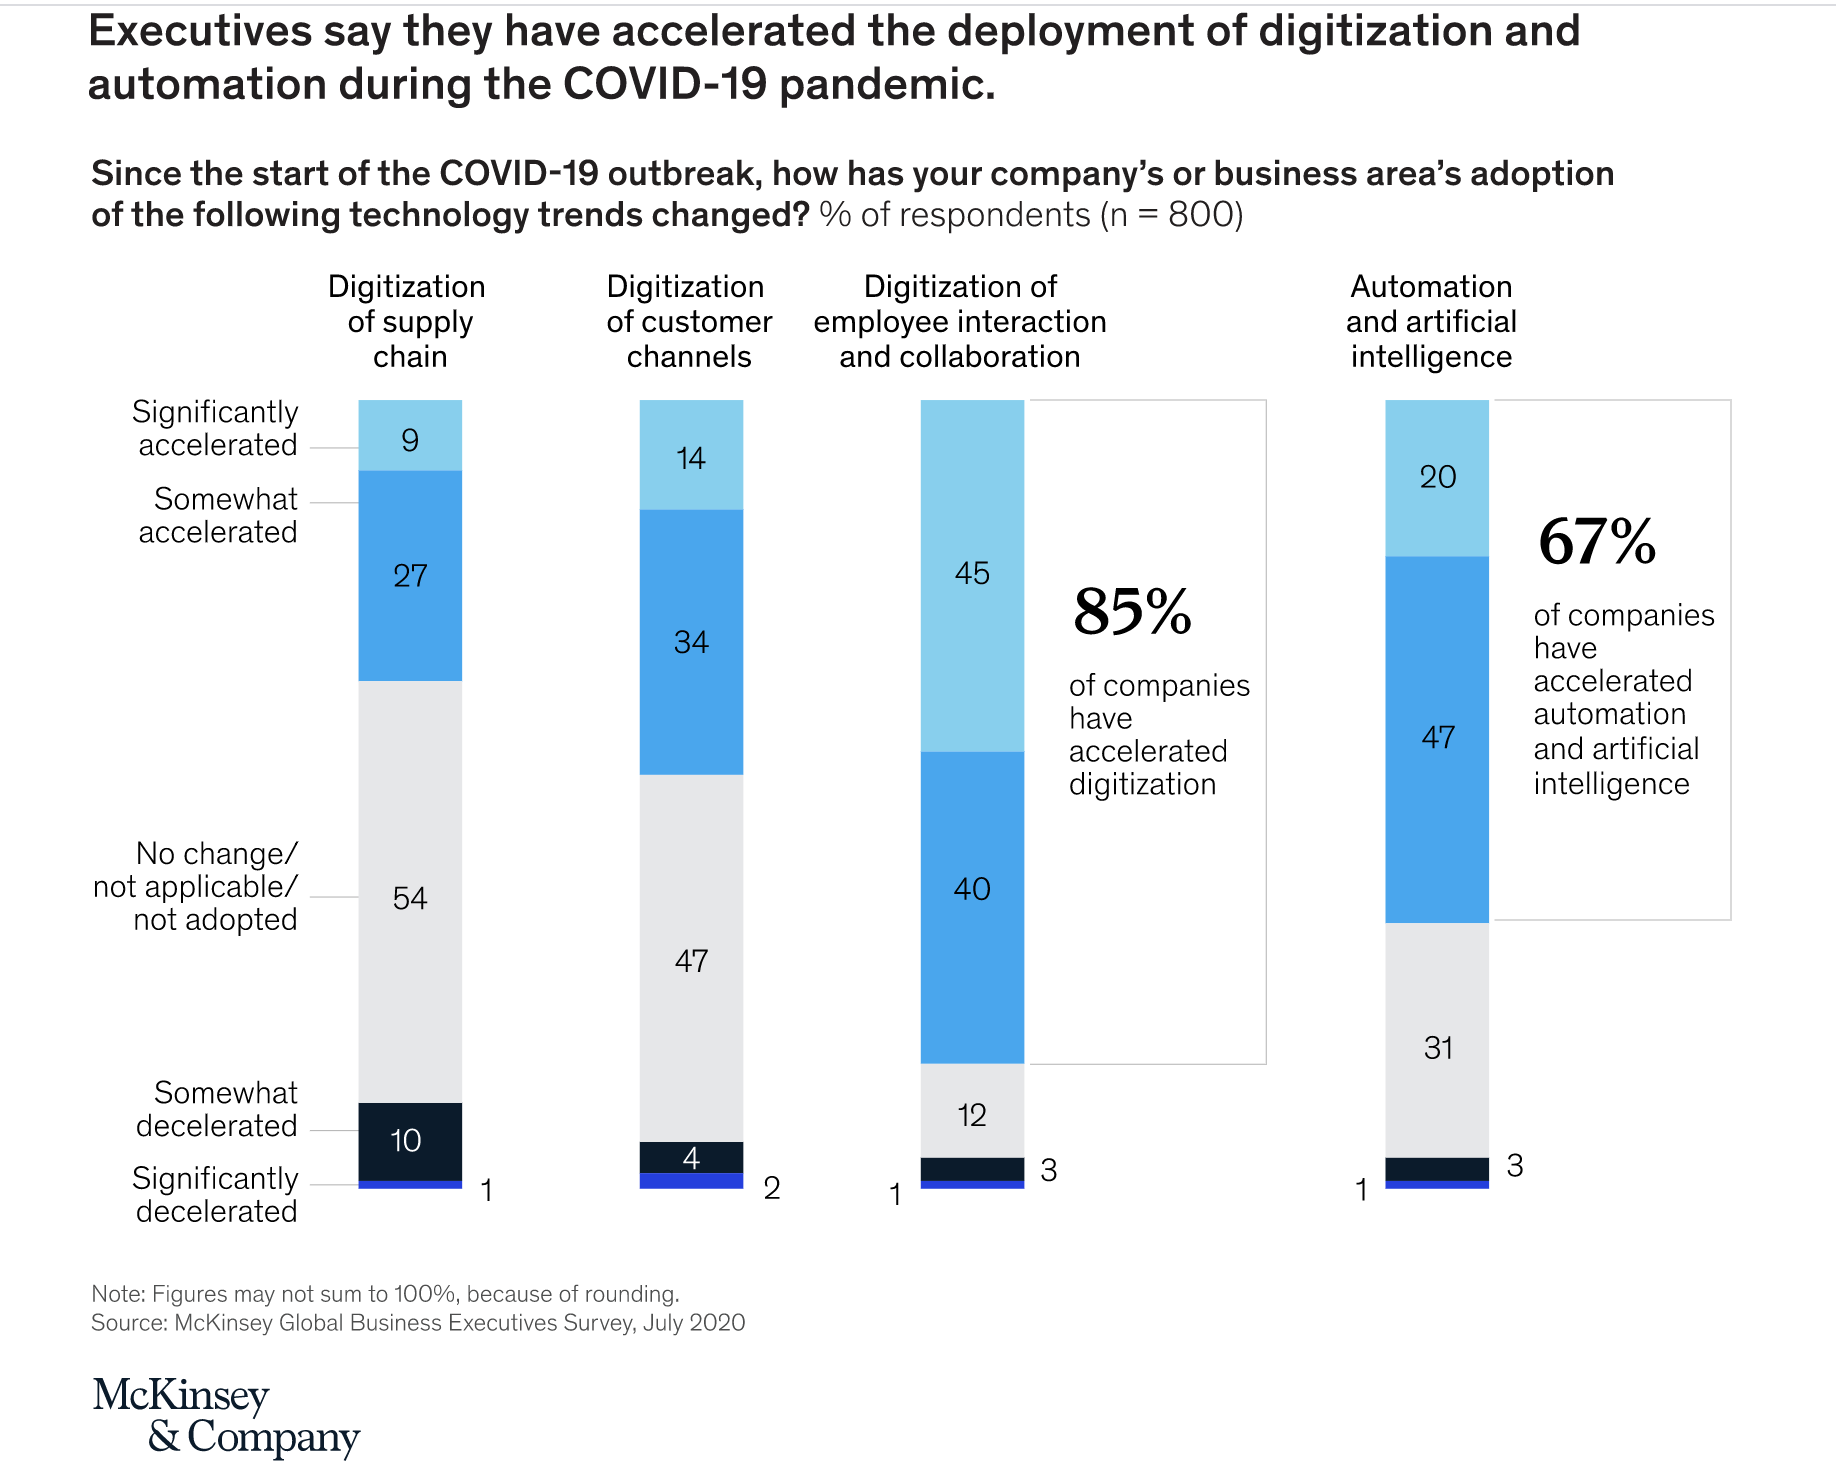

In [21]:
from PIL import Image
Image1 = Image.open("McKinsey.png");
Image1

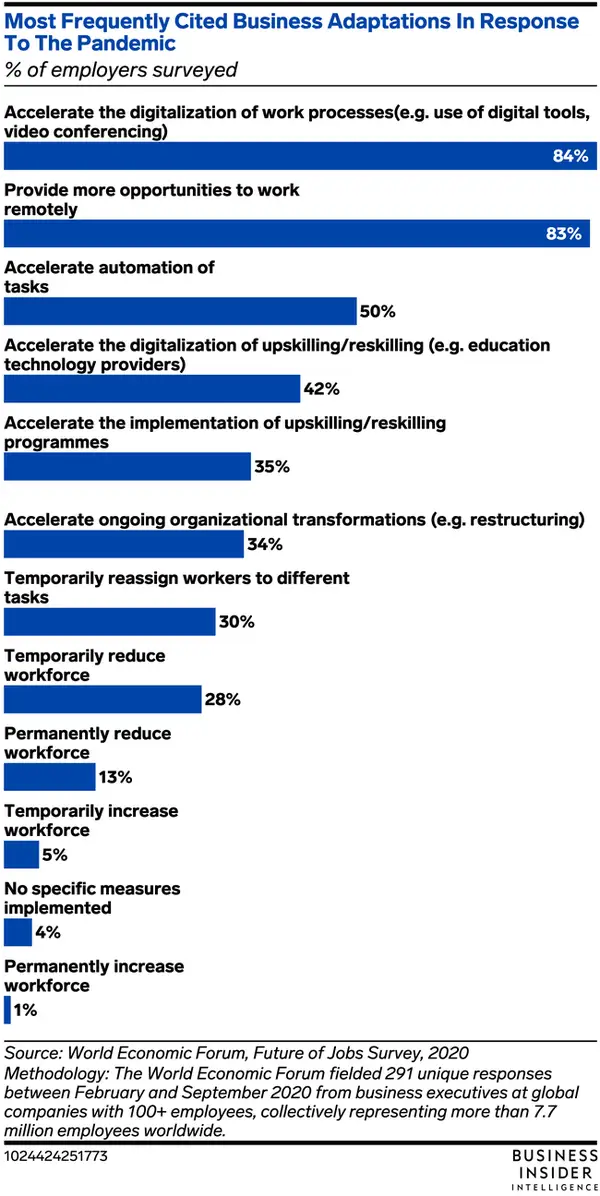

In [22]:
Image2 = Image.open("Business Insider.png");
Image2

***GitHub:*** https://github.com/arathinair11/Job_Automation_And_The_Future_Employment.git

***Github.io:*** https://arathinair11.github.io/Job_Automation_And_The_Future_Employment

***Zenodo:*** https://zenodo.org/record/4323086#.X9jaLy1h1MM